In [1]:
import pandas as pd
from pycirclize import Circos
from pandas.core.frame import DataFrame
import numpy as np
import os
import scanpy as sc

In [3]:
df = pd.read_csv('/mnt/LaCIE/ceger/Projects/COPD/COPD_influenza/6-cell-cell_comms/4-tensor/.data/liana_res_compartment.csv', index_col=0)
df

,batch,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,specificity_rank,magnitude_rank
0,CHE01_CTRL,Basal,Mixed,APP,CD74,7.412088,0.0,53.983128,0.739385,1.108115,0.016137,0.892482,0.000250,2.808640e-10
1,CHE01_CTRL,Goblet,Mixed,APP,CD74,7.376490,0.0,53.385807,0.701348,0.888435,0.015959,0.891947,0.000293,1.123452e-09
2,CHE01_CTRL,Basal,Ciliated,APP,CD74,7.283055,0.0,52.322640,0.640498,0.938717,0.015641,0.890974,0.000250,2.527757e-09
3,CHE01_CTRL,Goblet,Ciliated,APP,CD74,7.247458,0.0,51.743690,0.602461,0.719037,0.015468,0.890432,0.000635,1.011091e-08
4,CHE01_CTRL,Club,Mixed,APP,CD74,7.198581,0.0,50.400566,0.511244,0.612547,0.015066,0.889142,0.000798,2.274930e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7766863,ST10_GnR_IAV,SupraB,SupraB,TPH1,HTR2A,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00
7766864,ST10_GnR_IAV,SupraB,SupraB,TPH1,HTR4,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00
7766865,ST10_GnR_IAV,SupraB,SupraB,TPH1,HTR1D,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00
7766866,ST10_GnR_IAV,SupraB,SupraB,ADO,ADORA3,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00


In [4]:
def liana_res_to_interaction_matrix(
        liana_res: DataFrame,
        interaction_metric: str='magnitude_rank'
):
    if interaction_metric == 'magnitude_rank':
        liana_res['magnitude_rank_inverted'] = liana_res['magnitude_rank'].apply(lambda x: -np.log10(x + np.finfo(float).eps)).copy()

    source_target_table = (
        liana_res
        .groupby(['source', 'target'])
        .aggregate(
            {
                interaction_metric: 'sum'
            }
        )
        .pivot_table(
            columns='target',
            index='source',
            values=interaction_metric
        )
        .fillna(0)
    )
    return source_target_table

def liana_to_circos_plot(
        liana_res: DataFrame,
        interaction_metric: str='magnitude_rank'
):
    if interaction_metric == 'magnitude_rank':
        liana_res['magnitude_rank_inverted'] = liana_res['magnitude_rank'].apply(lambda x: -np.log10(x + np.finfo(float).eps))
        interaction_metric = 'magnitude_rank_inverted'

    source_target_table = (
        liana_res
        .groupby(['source', 'target'])
        .aggregate(
            {
                interaction_metric: 'sum'
            }
        )
        .pivot_table(
            columns='target',
            index='source',
            values=interaction_metric
        )
        .fillna(0)
    )
    circos = Circos.initialize_from_matrix(
        source_target_table,
        space=2,
        cmap="viridis",
        label_kws=dict(size=12, orientation="vertical"),
        link_kws=dict(direction=1, ec="black", lw=0.5),
    )
    fig = circos.plotfig()

In [5]:
df_filtered = df[df['source'].isin(['Basal', 'SupraB'])].copy()
df_filtered

,batch,source,target,ligand_complex,receptor_complex,lr_means,cellphone_pvals,expr_prod,scaled_weight,lr_logfc,spec_weight,lrscore,specificity_rank,magnitude_rank
0,CHE01_CTRL,Basal,Mixed,APP,CD74,7.412088,0.0,53.983128,0.739385,1.108115,0.016137,0.892482,0.000250,2.808640e-10
2,CHE01_CTRL,Basal,Ciliated,APP,CD74,7.283055,0.0,52.322640,0.640498,0.938717,0.015641,0.890974,0.000250,2.527757e-09
11,CHE01_CTRL,Basal,Basal,PKM,CD44,7.060767,0.0,48.840897,0.469795,0.994477,0.021982,0.887584,0.000026,9.099416e-08
18,CHE01_CTRL,Basal,Goblet,APP,CD74,7.031257,0.0,49.082310,0.447527,1.114270,0.014672,0.887830,0.000250,1.617638e-07
29,CHE01_CTRL,SupraB,Mixed,APP,CD74,7.018641,0.0,47.381237,0.318968,0.341061,0.014164,0.886061,0.001352,3.639522e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7766863,ST10_GnR_IAV,SupraB,SupraB,TPH1,HTR2A,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00
7766864,ST10_GnR_IAV,SupraB,SupraB,TPH1,HTR4,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00
7766865,ST10_GnR_IAV,SupraB,SupraB,TPH1,HTR1D,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00
7766866,ST10_GnR_IAV,SupraB,SupraB,ADO,ADORA3,0.364809,1.0,0.131731,-1.273457,-3.774718,0.000628,0.286524,1.000000,1.000000e+00


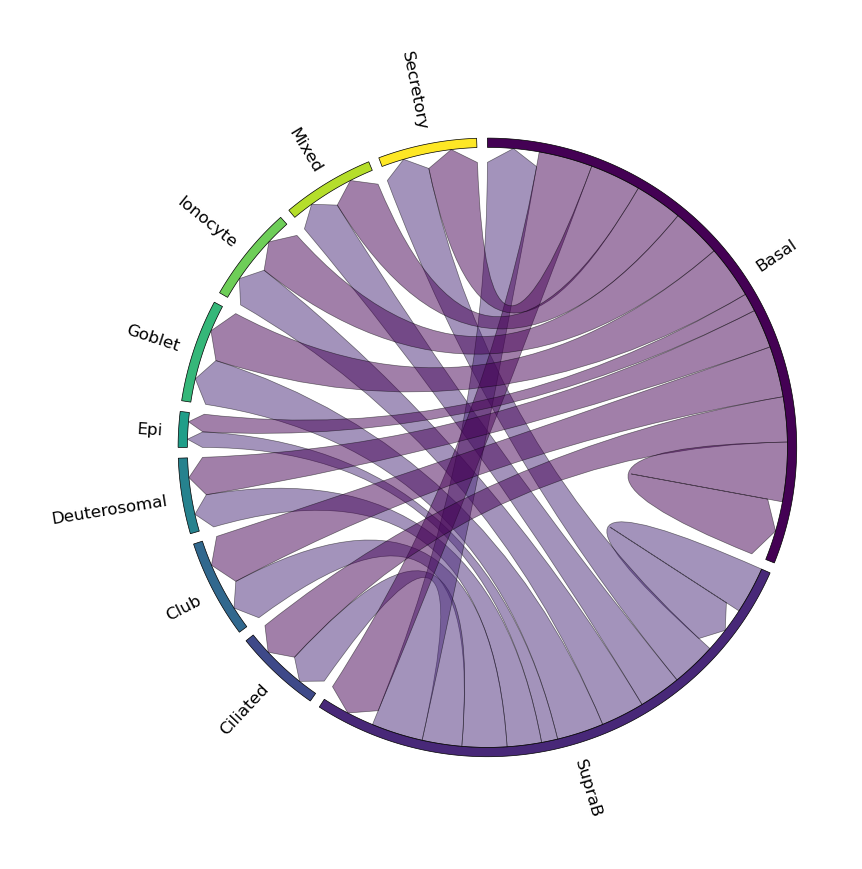

In [6]:
liana_to_circos_plot(df_filtered)

In [7]:
adata = sc.read_h5ad('/mnt/LaCIE/ceger/Projects/COPD/COPD_influenza/6-cell-cell_comms/4-tensor/.data/Marburg_cell_states_locked_ctl240709.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'viral_counts', 'infected_status', 'seed_labels', 'batch-scANVI'
    var: 'mt', 'ribo'
    uns: 'cell_compartment_colors', 'cell_states_colors', 'disease_colors', 'group_colors', 'infection_colors'
    obsm: 'X_scANVI', 'X_umap'

In [8]:
context_dict = {}
for condition in adata.obs['group'].unique():
    context_dict[condition] = list(adata.obs[adata.obs['group'] == condition]['batch'].unique())
pd.DataFrame.from_dict(context_dict)


,copd_ctrl,healthy_ctrl,healthy_iav,copd_iav
0,ST07_CSE_CTRL,GER14_CRTL,ST10_GnR_IAV,CHE01_IAV
1,CSE_06_CRTL,GnR08_CTRL,GnR_07_IAV,CHE02_IAV
2,CHE01_CTRL,GER12_CTRL,GER14_IAV,CHE03_IAV
3,CHE02_CTRL,GER02_CTRL,GnR08_IAV,CSE03_IAV
4,CHE03_CTRL,GnR_07_CTRL,GER12_IAV,ST09_CSE_IAV
5,CSE03_CTRL,ST08_GnR_CTRL,GER02_IAV,CSE_06_IAV


In [9]:
interaction_table_copd_ctrl = liana_res_to_interaction_matrix(df_filtered[df_filtered['batch'].isin(context_dict['copd_ctrl'])].copy())
interaction_table_copd_iav = liana_res_to_interaction_matrix(df_filtered[df_filtered['batch'].isin(context_dict['copd_iav'])].copy())
interaction_table_healthy_ctrl = liana_res_to_interaction_matrix(df_filtered[df_filtered['batch'].isin(context_dict['healthy_ctrl'])].copy())
interaction_table_healthy_iav = liana_res_to_interaction_matrix(df_filtered[df_filtered['batch'].isin(context_dict['healthy_iav'])].copy())
interaction_table_copd_ctrl, interaction_table_copd_iav, interaction_table_healthy_ctrl, interaction_table_copd_iav

(target         Basal      Ciliated          Club  Deuterosomal        Goblet  \
 source                                                                         
 Basal   18559.899746  18869.924298  18576.607005  18951.645726  18618.773814   
 SupraB  18794.053212  19094.305408  18811.736383  19172.619564  18844.273555   
 
 target      Ionocyte         Mixed     Secretory        SupraB  
 source                                                          
 Basal   18801.963009  18718.015387  18707.849770  18718.028399  
 SupraB  19020.022674  18942.472557  18926.998966  18946.632065  ,
 target        Basal      Ciliated          Club  Deuterosomal           Epi  \
 source                                                                        
 Basal   18676.82698  18942.699260  18843.599684  15700.830050  19556.039489   
 SupraB  18909.32862  19174.384562  19073.189656  15897.256772  19747.327030   
 
 target        Goblet      Ionocyte         Mixed     Secretory        SupraB  
 source

In [10]:
eps = 10000
union_columns = set(
    list(interaction_table_copd_ctrl) +
    list(interaction_table_copd_iav)
)
for column in union_columns:
    if column not in interaction_table_copd_ctrl.columns:
        interaction_table_copd_ctrl[column] = eps
    if column not in interaction_table_copd_iav.columns:
        interaction_table_copd_iav[column] = eps

In [70]:

source_target_table = interaction_table_copd_iav - interaction_table_copd_ctrl
source_target_table

target,Basal,Ciliated,Club,Deuterosomal,Epi,Goblet,Ionocyte,Mixed,Secretory,SupraB
source,,,,,,,,,,
Basal,116.927234,72.774962,266.992679,-3250.815677,9556.039489,95.183656,73.059983,85.729140,168.134344,73.667084
SupraB,115.275408,80.079154,261.453273,-3275.362793,9747.327030,101.032103,79.739712,90.389965,169.174337,73.819064


In [72]:
source_target_table.drop(['Deuterosomal', 'Epi'], axis=1, inplace=True)
source_target_table

target,Basal,Ciliated,Club,Goblet,Ionocyte,Mixed,Secretory,SupraB
source,,,,,,,,
Basal,116.927234,72.774962,266.992679,95.183656,73.059983,85.729140,168.134344,73.667084
SupraB,115.275408,80.079154,261.453273,101.032103,79.739712,90.389965,169.174337,73.819064


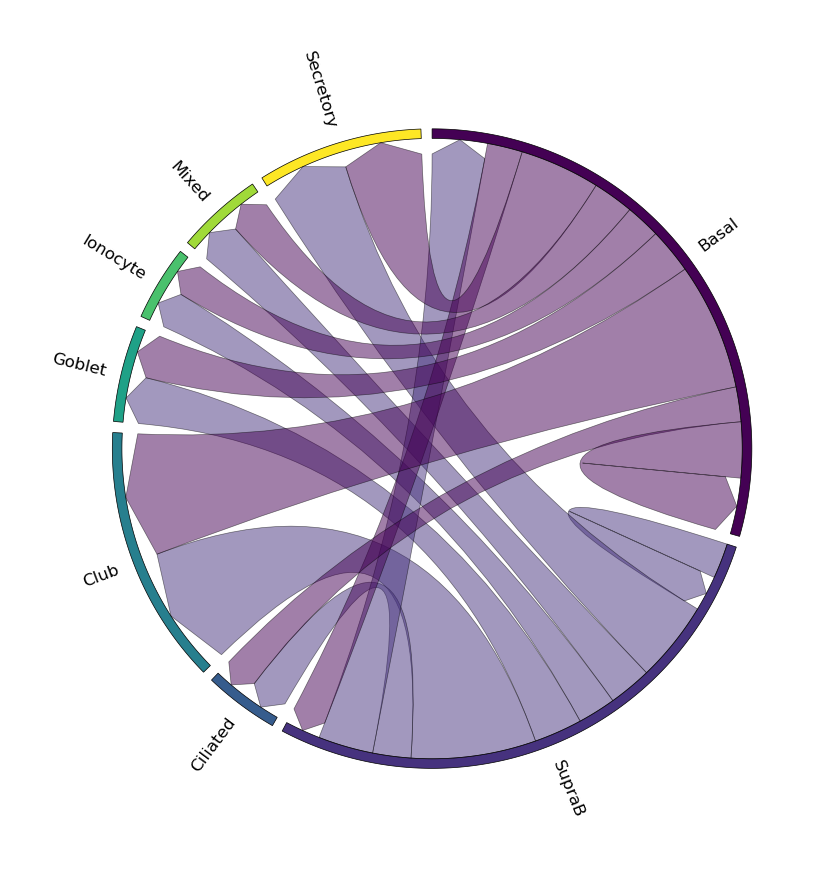

In [73]:
circos = Circos.initialize_from_matrix(
        source_target_table,
        space=2,
        cmap="viridis",
        label_kws=dict(size=12, orientation="vertical"),
        link_kws=dict(direction=1, ec="black", lw=0.5),
)
fig = circos.plotfig()

In [61]:
data = {'A': [1, -0.271482, 0.], 'B': [1, -0.270270, -0.270270]}
df = pd.DataFrame(data, index=['A', 'B', 'C'])
df

,A,B
A,1.000000,1.00000
B,-0.271482,-0.27027
C,0.000000,-0.27027


In [62]:
circos = Circos.initialize_from_matrix(
        df, 
        space=2,
        cmap="viridis",
        label_kws=dict(size=12, orientation="vertical"),
        link_kws=dict(direction=1, ec="black", lw=0.5),
)
fig = circos.plotfig()

ZeroDivisionError: float division by zero